In [117]:
from google.colab import files
uploaded = files.upload()

Saving bc_avg_ms_dat.xlsx to bc_avg_ms_dat.xlsx


In [119]:
import numpy as np
import pandas as pd
import math
df1 = pd.read_excel('bc_avg_ms_dat.xlsx')

###LOADING THE EXCEL FILES AND SEPERATING SHEETS

In [121]:
import openpyxl as pxl
from openpyxl import load_workbook

exp = pxl.load_workbook('bc_avg_ms_dat.xlsx')

In [126]:
sheet = exp['Avg Cancer samples']

In [127]:
sheet1 = exp['Avg Normal samples']

###DATA SHAPE

In [130]:
df1

,m/z,Abs Int,m/z.1,Abs Int.1,m/z.2,Abs Int.2,m/z.3,Abs Int.3,m/z.4,Abs Int.4,m/z.5,Abs Int.5,m/z.6,Abs Int.6,m/z.7,Abs Int.7,m/z.8,Abs Int.8,m/z.9,Abs Int.9,m/z.10,Abs Int.10,m/z.11,Abs Int.11,m/z.12,Abs Int.12,m/z.13,Abs Int.13,m/z.14,Abs Int.14,m/z.15,Abs Int.15,m/z.16,Abs Int.16,m/z.17,Abs Int.17,m/z.18,Abs Int.18,m/z.19,Abs Int.19,m/z.20,Abs Int.20
0,NaN,BC0,NaN,BC1,NaN,BC3,NaN,BC4,NaN,BC6,NaN,BC7,NaN,BC8,NaN,BC9,NaN,BC10,NaN,BC12,NaN,BC13,NaN,BC14,NaN,BC15,NaN,BC16,NaN,BC17,NaN,BC18,NaN,BC21,NaN,BC22,NaN,BC24,NaN,BC25,NaN,BC26
1,149.999665,-0.00593,149.999625,-0.004713,149.999628,-0.0259657,149.999623,-0.012059,149.999626,-0.02279,149.999625,-0.026642,149.999623,-0.01039,149.999730,-0.045782,149.999625,-0.012783,149.999639,-0.008948,149.999725,-0.00310953,149.999633,-0.005468,149.999637,-0.0358158,149.999628,-0.013437,149.999634,-0.00842,149.999663,-0.0250549,149.999785,-0.0341417,149.999939,-0.00382557,149.999641,-0.0142462,149.999667,-0.0228513,149.999646,-0.037286
2,150.001395,-7.40733,150.001395,-9.0787,150.001395,-7.70712,150.001395,-5.36173,150.001395,-7.88879,150.007681,-7.50353,150.001395,-5.85085,150.011610,-3.74373,150.001395,-6.25627,150.001395,-6.55652,150.001395,-11.9681,150.001395,-10.7057,150.002574,-16.6059,150.002181,-8.98852,150.001788,-10.1675,150.012003,-10.3068,150.001788,-3.42501,150.001788,-5.71432,150.003360,-14.4279,150.007289,-8.31455,150.001395,-7.79237
3,150.003360,-7.2852,150.002967,-9.01247,150.002967,-7.69725,150.004145,-5.27009,150.006110,-7.82888,150.009253,-7.34443,150.002967,-5.80534,150.013182,0.009363,150.007681,-6.02843,150.002967,-6.36467,150.003360,-11.8199,150.002967,-10.5815,150.004145,-16.4283,150.003753,-8.89759,150.003360,-10.0539,150.013575,-8.79761,150.003360,-3.24758,150.004145,-5.56759,150.004931,-14.325,150.008860,-8.08453,150.002967,-7.74164
4,150.004931,-7.13342,150.004538,-8.98018,150.004538,-7.6879,150.005717,-5.18033,150.007681,-7.75224,150.011134,-7.28226,150.004538,-5.76942,150.014754,-3.5366,150.009253,-5.91938,150.004538,-6.09167,150.005717,-11.6508,150.005717,-10.399,150.005717,-16.2567,150.006110,-8.82575,150.009253,-9.53661,150.015147,-10.2855,150.004909,-3.12478,150.011610,-5.19143,150.006503,-14.2597,150.010432,-7.88286,150.011218,-7.56669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199.938629,1.32862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199.956406,1.29789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199.974185,1.26318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1204.439499,-2.63044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df1.size

6535158

In [132]:
df1.head()

,m/z,Abs Int,m/z.1,Abs Int.1,m/z.2,Abs Int.2,m/z.3,Abs Int.3,m/z.4,Abs Int.4,m/z.5,Abs Int.5,m/z.6,Abs Int.6,m/z.7,Abs Int.7,m/z.8,Abs Int.8,m/z.9,Abs Int.9,m/z.10,Abs Int.10,m/z.11,Abs Int.11,m/z.12,Abs Int.12,m/z.13,Abs Int.13,m/z.14,Abs Int.14,m/z.15,Abs Int.15,m/z.16,Abs Int.16,m/z.17,Abs Int.17,m/z.18,Abs Int.18,m/z.19,Abs Int.19,m/z.20,Abs Int.20
0,NaN,BC0,NaN,BC1,NaN,BC3,NaN,BC4,NaN,BC6,NaN,BC7,NaN,BC8,NaN,BC9,NaN,BC10,NaN,BC12,NaN,BC13,NaN,BC14,NaN,BC15,NaN,BC16,NaN,BC17,NaN,BC18,NaN,BC21,NaN,BC22,NaN,BC24,NaN,BC25,NaN,BC26
1,149.999665,-0.00593,149.999625,-0.004713,149.999628,-0.0259657,149.999623,-0.012059,149.999626,-0.02279,149.999625,-0.026642,149.999623,-0.01039,149.999730,-0.045782,149.999625,-0.012783,149.999639,-0.008948,149.999725,-0.00310953,149.999633,-0.005468,149.999637,-0.0358158,149.999628,-0.013437,149.999634,-0.00842,149.999663,-0.0250549,149.999785,-0.0341417,149.999939,-0.00382557,149.999641,-0.0142462,149.999667,-0.0228513,149.999646,-0.037286
2,150.001395,-7.40733,150.001395,-9.0787,150.001395,-7.70712,150.001395,-5.36173,150.001395,-7.88879,150.007681,-7.50353,150.001395,-5.85085,150.011610,-3.74373,150.001395,-6.25627,150.001395,-6.55652,150.001395,-11.9681,150.001395,-10.7057,150.002574,-16.6059,150.002181,-8.98852,150.001788,-10.1675,150.012003,-10.3068,150.001788,-3.42501,150.001788,-5.71432,150.003360,-14.4279,150.007289,-8.31455,150.001395,-7.79237
3,150.003360,-7.2852,150.002967,-9.01247,150.002967,-7.69725,150.004145,-5.27009,150.006110,-7.82888,150.009253,-7.34443,150.002967,-5.80534,150.013182,0.009363,150.007681,-6.02843,150.002967,-6.36467,150.003360,-11.8199,150.002967,-10.5815,150.004145,-16.4283,150.003753,-8.89759,150.003360,-10.0539,150.013575,-8.79761,150.003360,-3.24758,150.004145,-5.56759,150.004931,-14.325,150.008860,-8.08453,150.002967,-7.74164
4,150.004931,-7.13342,150.004538,-8.98018,150.004538,-7.6879,150.005717,-5.18033,150.007681,-7.75224,150.011134,-7.28226,150.004538,-5.76942,150.014754,-3.5366,150.009253,-5.91938,150.004538,-6.09167,150.005717,-11.6508,150.005717,-10.399,150.005717,-16.2567,150.006110,-8.82575,150.009253,-9.53661,150.015147,-10.2855,150.004909,-3.12478,150.011610,-5.19143,150.006503,-14.2597,150.010432,-7.88286,150.011218,-7.56669


In [133]:
df1.tail()

,m/z,Abs Int,m/z.1,Abs Int.1,m/z.2,Abs Int.2,m/z.3,Abs Int.3,m/z.4,Abs Int.4,m/z.5,Abs Int.5,m/z.6,Abs Int.6,m/z.7,Abs Int.7,m/z.8,Abs Int.8,m/z.9,Abs Int.9,m/z.10,Abs Int.10,m/z.11,Abs Int.11,m/z.12,Abs Int.12,m/z.13,Abs Int.13,m/z.14,Abs Int.14,m/z.15,Abs Int.15,m/z.16,Abs Int.16,m/z.17,Abs Int.17,m/z.18,Abs Int.18,m/z.19,Abs Int.19,m/z.20,Abs Int.20
155594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199.938629,1.32862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199.956406,1.29789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1199.974185,1.26318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1204.439499,-2.63044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1204.451717,-0.010884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###ROUND DECIMALS DOWN FUNCTION

In [123]:
def round_decimals_down(number:float, decimals:int=2):
    if decimals == 0:
        return math.floor(number)

    factor = 10 ** decimals
    return math.floor(number * factor) / factor

###ROUND DECIMALS UP FUNCTION

In [ ]:
def round_decimals_up(number:float, decimals:int=2):
    if decimals == 0:
        return math.ceil(number)

    factor = 10 ** decimals
    return math.ceil(number * factor) / factor

###TAKING THE PEAK VALUE AND TOTAL INTERVAL LENGTH FROM THE USER AND CALCULATING THE UPPER AND LOWER RANGE

In [177]:
peak = float(input("Enter the Peak Value: "))
total_interval_length = float(input("Enter Total Interval Length: "))
lower_range = round_decimals_down(peak) - (total_interval_length*0.5)
print("Lower Range: ", lower_range)
upper_range = round_decimals_up(peak) + (total_interval_length*0.5)
print("Upper Range: ", upper_range)

Enter the Peak Value: 725.5551
Enter Total Interval Length: 0.2
Lower Range:  725.4499999999999
Upper Range:  725.66


In [124]:
'''
Use This Piece of Code if you want to give a value of interval, beforehand
'''
'''
peak = float(input("Enter the Peak Value: "))
print("Considering a Total 0.2 Length interval including the peak value at the middle we get the Lower & Upper Ranges as:")
lower_range = round_decimals_down(peak) - 0.1
print("Lower Range: ", lower_range)
upper_range = round_decimals_up(peak) + 0.1
print("Upper Range: ", upper_range)
'''

Enter the Peak Value: 725.5551
Considering a Total 0.2 Length interval including the peak value at the middle we get the Lower & Upper Ranges as:
Lower Range:  725.4499999999999
Upper Range:  725.66


###THE MAIN FUCNTION
In this function, we gave the output seperately for the sepearet BC Cell Values but they can be put into one array easily switching the position of the piece of code that is responsible to do the same.
The following inequality has been taken into consideration while writing the code.\
(peak_value - (total_interval_length * 0.5)) <=
lowpos <= peak_value <= uppos <= (peak_value - (total_interval_length * 0.5))

In [189]:
result = []
mz_abs_arr = [[]]
flag = 0
print("------------------------------------------------------------------------------------------")
print('ANALYSIS FOR: Avg cancer samples')
print("------------------------------------------------------------------------------------------")
print('Format for the Result Array: [BC(i), Max_Intensity_Value, Correspoding_M/Z_Ratio_for_BC(i)]')
print("------------------------------------------------------------------------------------------")
for x in range(1, sheet.max_column+1, 2):
    # print("Finding for", sheet.cell(row=2, column=x+1).value)

    lowpos = None
    uppos = None
    result.append([sheet.cell(row=2, column=x+1).value])

    # print(lower_range,upper_range)
    for i in range(3, sheet.max_row+1):
        if float(sheet.cell(row=i, column=x).value) >= lower_range:
            lowpos = i
            break

    for i in range(lowpos+1, sheet.max_row+1):
        if float(sheet.cell(row=i, column=x).value) > upper_range:
            uppos = i-1
            break

    arr = []
    absint = []
    
    for i in range(lowpos, uppos+1):
        arr.append([float(sheet.cell(row=i, column=x).value),float(sheet.cell(row=i, column=x+1).value)])
        absint.append(float(sheet.cell(row=i, column=x+1).value))
        
    maxint = max(absint)

    absint.sort()
    for i in arr:
        if i[1] == maxint:

            result[-1].append(i[0])
            result[-1].append(i[1])
            mz_abs_arr[-1].append(i[0])
            mz_abs_arr[-1].append(i[1])
            #Comment these two lines and uncomment the Final three lines to print all the result_arrays at once 
            print("BC Cell Value: ",result[0][0])
            print("Maximum Intensity within Peak+-0.1:",result[0][1])
            print("M/Z Ratio to the corresponding Maximum Intensity:",result[0][2])
            flag = flag + 1
            
            result = []
            break

    arr.sort()
    sortarr = []

    for i in absint:
        for j in arr:
            if j[1] == i:
                sortarr.append([j[0], i])
                break
    print("------------------------------------------------------------------------------------------")
    print("Sorted array for:", sheet.cell(row=2, column=x+1).value)
        
    
    
    # Comment the below two Lines,  if you want to dont want to see the sorted array
    
    for z in sortarr:
        print(z)
        
    print("------------------------------------------------------------------------------------------")
    
print("Total Iterations Done: ",flag)

# print('Format for Priting will be: [ BC(i), Max_Intensity_Value_within_that_range, Correspoding_M/_Ratio_for_BC(i) ] ')
# for i in result:
#     print("For",i)

------------------------------------------------------------------------------------------
ANALYSIS FOR: Avg cancer samples
------------------------------------------------------------------------------------------
Format for the Result Array: [BC(i), Max_Intensity_Value, Correspoding_M/Z_Ratio_for_BC(i)]
------------------------------------------------------------------------------------------
BC Cell Value:  BC0
Maximum Intensity within Peak+-0.1: 725.554767
M/Z Ratio to the corresponding Maximum Intensity: 9479.616894
------------------------------------------------------------------------------------------
Sorted array for: BC0
[725.45603, -5.77788]
[725.464444, -5.750251]
[725.481102, -5.616778]
[725.489459, -5.468543]
[725.497817, -5.44054]
[725.506175, -5.195606]
[725.514103, -3.96443]
[725.64001, -3.259706]
[725.629501, -2.76045]
[725.596424, -1.987343]
[725.589064, -1.335155]
[725.62061, 1.659011]
[725.60389, 2.441222]
[725.61225, 6.706481]
[725.578812, 21.93257]
[725.522316, 

###Now all the M/Z Ratio & Max_intensity values are kept into one array and later it is reshaped into 21*2 2D Array.
The Values could be taken directly into 2D array but I found this easy here as the Single Iteration Column Pair has only Two Cosiderable attributes so, it could be easily sliced. 

In [190]:
print(mz_abs_arr)
mz_abs_arr_2d = np.reshape(mz_abs_arr, (flag, 2))
mz_abs_arr_2d

[[725.554767, 9479.616894, 725.552011, 852.076473, 725.552057489223, 587.709334035019, 725.552513, 1024.60981, 725.55235, 1573.344856, 725.557038, 998.298004, 725.551989, 1124.038133, 725.556271, 1435.028306, 725.552055, 497.891767, 725.552302, 2256.718825, 725.555864298972, 971.998974955386, 725.551786, 854.071421, 725.552587588705, 2103.10315082483, 725.553834, 945.014767, 725.55166, 2184.387395, 725.550775555364, 1987.6567518036, 725.553775010479, 4774.54716294642, 725.556174077669, 1971.61437568029, 725.552017081872, 1934.39216440845, 725.556034791015, 2827.93118450228, 725.552136004751, 1586.53507296976]]


array([[ 725.554767  , 9479.616894  ],
       [ 725.552011  ,  852.076473  ],
       [ 725.55205749,  587.70933404],
       [ 725.552513  , 1024.60981   ],
       [ 725.55235   , 1573.344856  ],
       [ 725.557038  ,  998.298004  ],
       [ 725.551989  , 1124.038133  ],
       [ 725.556271  , 1435.028306  ],
       [ 725.552055  ,  497.891767  ],
       [ 725.552302  , 2256.718825  ],
       [ 725.5558643 ,  971.99897496],
       [ 725.551786  ,  854.071421  ],
       [ 725.55258759, 2103.10315082],
       [ 725.553834  ,  945.014767  ],
       [ 725.55166   , 2184.387395  ],
       [ 725.55077556, 1987.6567518 ],
       [ 725.55377501, 4774.54716295],
       [ 725.55617408, 1971.61437568],
       [ 725.55201708, 1934.39216441],
       [ 725.55603479, 2827.9311845 ],
       [ 725.552136  , 1586.53507297]])

###THE PLOT OF M/Z RATIO & MAX_INTENSITY
As the M/Z Intensity Values are almost the same upto three decimals, so the colour map on the left side of the figure is hsowing only one colour.
To get a clearer view, we can transform the M/Z values of the array. it is done in the Next cell and the result is far clearer.

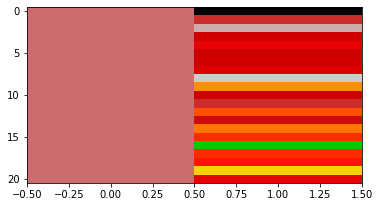

In [191]:
import matplotlib.pyplot as plt
plt.imshow(mz_abs_arr_2d, interpolation=None, aspect=0.05, cmap='nipy_spectral_r')
plt.show()

The Same Process is repeated for SHEET2 : Avg Normal Samples

In [172]:
flag1=0
result1 = []
mz_abs_arr1 = [[]]

print("------------------------------------------------------------------------------------------")
print('ANALYSIS FOR: Avg Normal samples')
print("------------------------------------------------------------------------------------------")
print('Format for Priting will be: [BC(i), Max_Intensity_Value, Correspoding_M/Z_Ratio_for_BC(i)]')
print("------------------------------------------------------------------------------------------")
for x in range(1, sheet1.max_column+1, 2):
    # print("Finding for", sheet1.cell(row=2, column=x+1).value)

    lowpos = None
    uppos = None
    result1.append([sheet1.cell(row=2, column=x+1).value])

    # print(lower_range,upper_range)
    for i in range(3, sheet1.max_row+1):
        if float(sheet1.cell(row=i, column=x).value) >= lower_range:
            lowpos = i
            break

    for i in range(lowpos+1, sheet1.max_row+1):
        if float(sheet1.cell(row=i, column=x).value) > upper_range:
            uppos = i-1
            break

    arr = []
    absint = []
    
    for i in range(lowpos, uppos+1):
        arr.append([float(sheet1.cell(row=i, column=x).value),float(sheet1.cell(row=i, column=x+1).value)])
        absint.append(float(sheet1.cell(row=i, column=x+1).value))
        
    maxint = max(absint)

    absint.sort()
    for i in arr:
        if i[1] == maxint:

            result1[-1].append(i[0])
            result1[-1].append(i[1])
            mz_abs_arr1[-1].append(i[0])
            mz_abs_arr1[-1].append(i[1])
            #Comment these two lines and uncomment the Final three lines to print all the result_arrays at once 
            print("BC Cell Value: ",result1[0][0])
            print("Maximum Intensity within Peak+-0.1:",result1[0][1])
            print("M/Z Ratio to the corresponding Maximum Intensity:",result1[0][2])
            flag1 = flag1 + 1
            
            result1 = []
            break

    arr.sort()
    sortarr = []

    for i in absint:
        for j in arr:
            if j[1] == i:
                sortarr.append([j[0], i])
                break
    print("------------------------------------------------------------------------------------------")
    print("Sorted array for:", sheet1.cell(row=2, column=x+1).value)
        
    
    
    # Comment the below two Lines,  if you want to dont want to see the sorted array
    for z in sortarr:
        print(z)
    print('-------------------------')
    
print("Total Iterations Done: ",flag1)
# print('Format for Priting will be: [ BC(i), Max_Intensity_Value_within_that_range, Correspoding_M/_Ratio_for_BC(i) ] ')
# for i in result:
#     print("For",i)

------------------------------------------------------------------------------------------
ANALYSIS FOR: Avg Normal samples
------------------------------------------------------------------------------------------
Format for Priting will be: [BC(i), Max_Intensity_Value, Correspoding_M/Z_Ratio_for_BC(i)]
------------------------------------------------------------------------------------------
BC Cell Value:  BC0
Maximum Intensity within Peak+-0.1: 725.556325
M/Z Ratio to the corresponding Maximum Intensity: 996.961935
------------------------------------------------------------------------------------------
Sorted array for: BC0
[725.589761, -7.758462]
[725.581201, -6.904019]
[725.501996, -0.755077]
[725.510354, 0.042141]
[725.518712, 14.441352]
[725.572122, 16.431031]
[725.52659, 24.686584]
[725.533951, 41.775848]
[725.564014, 335.959767]
[725.541606, 347.728883]
[725.548946, 958.844706]
[725.556325, 996.961935]
-------------------------
BC Cell Value:  BC1
Maximum Intensity within P

In [173]:
print(mz_abs_arr1)
mz_abs_arr_2d1 = np.reshape(mz_abs_arr1, (flag1, 2))
mz_abs_arr_2d1

[[725.556325, 996.961935, 725.556587, 280.271014, 725.55261149251, 281.765765066739, 725.556104, 387.508389, 725.555955, 308.447558, 725.55616, 133.771275, 725.551985, 349.220182, 725.555903, 708.654351, 725.556591, 230.904463, 725.555516, 514.966988, 725.555761853896, 280.240724587259, 725.548821, 394.662756, 725.555833497922, 763.359049741989, 725.556323, 457.036256, 725.552027, 583.282477, 725.556177090672, 822.958452572928, 725.555832782434, 495.268952131429, 725.556051564658, 751.174306522353, 725.552102789219, 600.805180961187, 725.552048967272, 426.805750319871, 725.556288123008, 599.248215912099]]


array([[725.556325  , 996.961935  ],
       [725.556587  , 280.271014  ],
       [725.55261149, 281.76576507],
       [725.556104  , 387.508389  ],
       [725.555955  , 308.447558  ],
       [725.55616   , 133.771275  ],
       [725.551985  , 349.220182  ],
       [725.555903  , 708.654351  ],
       [725.556591  , 230.904463  ],
       [725.555516  , 514.966988  ],
       [725.55576185, 280.24072459],
       [725.548821  , 394.662756  ],
       [725.5558335 , 763.35904974],
       [725.556323  , 457.036256  ],
       [725.552027  , 583.282477  ],
       [725.55617709, 822.95845257],
       [725.55583278, 495.26895213],
       [725.55605156, 751.17430652],
       [725.55210279, 600.80518096],
       [725.55204897, 426.80575032],
       [725.55628812, 599.24821591]])

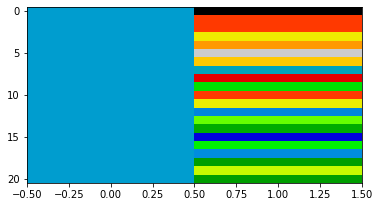

In [174]:
import matplotlib.pyplot as plt
plt.imshow(mz_abs_arr_2d1, interpolation=None, aspect=0.05, cmap='nipy_spectral_r')
plt.show()